In [9]:
%run imports.py

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
GPU available:  True
OS:  linux


In [10]:
#Training for different weight decays, with weight statistics: ws

wds=[0,5e-7,5e-5,5e-3,5e-1]

sch="plateau"
total_epochs=120
step=40
bs=128
#Change name

def train_prog_wd():
    for wd in wds:
        print("Step: " + str(wd))

        name="adagrad_bs_"+str(bs) + "_sch_"+ sch + "_wd_" + str(wd)
        save_folder=name+"/"+name

        net=models.resnet18(num_classes=10)
        criterion = nn.CrossEntropyLoss()
        #network and criterion have to be send to gpu before constructing the optimizer
        criterion.cuda()
        net.cuda()
        # Observe that all parameters are being optimized
        #optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=wd)
        #optimizer = optim.Adam(net.parameters(), lr=0.1, betas=(0.9, 0.999), eps=1e-08, weight_decay=wd, amsgrad=False)
        optimizer = torch.optim.Adagrad(net.parameters(), lr=0.1, lr_decay=0, weight_decay=wd, initial_accumulator_value=0, eps=1e-10)
        # Decay LR by a factor of 0.1 every 7 epochs
        # exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
        #plateau_lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=3,threshold=1e-3)
        if sch=="cosine":
            scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=150)
        elif sch=="plateau":
            scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=3,threshold=1e-3)

        model_actions.progressive_train_ws(net,epochs=total_epochs,step=step,tr_bs=bs,save_folder=save_folder,criterion=criterion,scheduler=scheduler)

In [11]:
#Training for different batch sizes, with weight statistics: ws

bss=[64,128,256,512,1024]
sch="plateau"
total_epochs=120
step=40
wd=0
#Change name

def train_prog_bs():
    i=1
    for bs in bss:
        print("Step: " + str(i))
        i=i+1

        name="adagrad_bs_"+str(bs)
        save_folder=name+"/"+name

        net=models.resnet18(num_classes=10)
        criterion = nn.CrossEntropyLoss()
        #network and criterion have to be send to gpu before constructing the optimizer
        criterion.cuda()
        net.cuda()
        # Observe that all parameters are being optimized
        #optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=wd)
        #optimizer = optim.Adam(net.parameters(), lr=0.1, betas=(0.9, 0.999), eps=1e-08, weight_decay=wd, amsgrad=False)
        optimizer = torch.optim.Adagrad(net.parameters(), lr=0.1, lr_decay=0, weight_decay=0, initial_accumulator_value=0, eps=1e-10)
        # Decay LR by a factor of 0.1 every 7 epochs
        # exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
        #plateau_lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=3,threshold=1e-3)
        if sch=="cosine":
            scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=150)
        elif sch=="plateau":
            scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=3,threshold=1e-3)

        model_actions.progressive_train_ws(net,epochs=total_epochs,step=step,tr_bs=bs,save_folder=save_folder,criterion=criterion,scheduler=scheduler)

In [12]:
def bs_and_wd():
    train_prog_bs()
    train_prog_wd()


In [13]:
az_manage_proc.run_and_delete(log.log_time,bs_and_wd)

Found existing instance, use it.
Logging time
Step: 1
Training


Epoch: 1
Saving best..

Epoch: 2
Saving best..

Epoch: 3
Saving best..

Epoch: 4
Saving best..

Epoch: 5
Saving best..

Epoch: 6

Epoch: 7
Saving best..

Epoch: 8
Saving best..

Epoch: 10
Saving best..

Epoch: 11
Saving best..

Epoch: 12


In [17]:
#Training for different beta1s, with weight statistics: ws

beta1s=[0.6,0.8,0.99]
sch="plateau"
total_epochs=160
step=40
wd=0
bs=128

def train_prog_beta1():
    i=1
    for beta1 in beta1s:
        print("Step: " + str(i))
        i=i+1

        name="adam_beta1_"+str(beta1)
        save_folder=name+"/"+name

        net=models.resnet18(num_classes=10)
        criterion = nn.CrossEntropyLoss()
        # Observe that all parameters are being optimized
        #optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=wd)
        optimizer = optim.Adam(net.parameters(), lr=0.1, betas=(beta1, 0.999), eps=1e-08, weight_decay=wd, amsgrad=False)
        # Decay LR by a factor of 0.1 every 7 epochs
        # exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
        #plateau_lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=3,threshold=1e-3)
        if sch=="cosine":
            scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=150)
        elif sch=="plateau":
            scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=3,threshold=1e-3)

        model_actions.progressive_train_ws(net,epochs=total_epochs,step=step,tr_bs=bs,save_folder=save_folder,criterion=criterion,scheduler=scheduler)

In [18]:
def bs_and_beta1():
    train_prog_beta1()
    train_prog_bs()


In [19]:
az_manage_proc.run_and_delete(log.log_time,bs_and_beta1)

Found existing instance, use it.
Logging time
Step: 1
Training


Epoch: 1
Saving best..

Epoch: 2
Saving best..

Epoch: 3

Epoch: 4
Saving best..

Epoch: 5
Saving best..

Epoch: 6
Saving best..

Epoch: 7
Saving best..

Epoch: 8

Epoch: 9
Saving best..

Epoch: 10

Epoch: 11

Epoch: 12
Saving best..

Epoch: 13

Epoch: 14

Epoch: 15

Epoch: 16
Saving best..

Epoch: 17
Saving best..

Epoch: 18
Saving best..

Epoch: 19
Saving best..

Epoch: 20

Epoch: 21

Epoch: 22

Epoch: 23

Epoch: 24
Saving best..

Epoch: 25
Saving best..

Epoch: 26
Saving best..

Epoch: 27
Saving best..

Epoch: 28
Saving best..

Epoch: 29
Saving best..

Epoch: 30

Epoch: 31
Saving best..

Epoch: 32

Epoch: 33
Saving best..

Epoch: 34

Epoch: 35
Saving best..

Epoch: 36
Saving best..

Epoch: 37

Epoch: 38
Saving best..

Epoch: 39

Epoch: 40
Saving step..

Epoch: 41
Saving best..

Epoch: 42
Saving best..

Epoch: 43

Epoch: 44

Epoch: 45

Epoch: 46

Epoch: 47

Epoch: 48

Epoch: 49

Epoch: 50

Epoch: 51

Epoch: 52

Epoch: 5

# Graphs

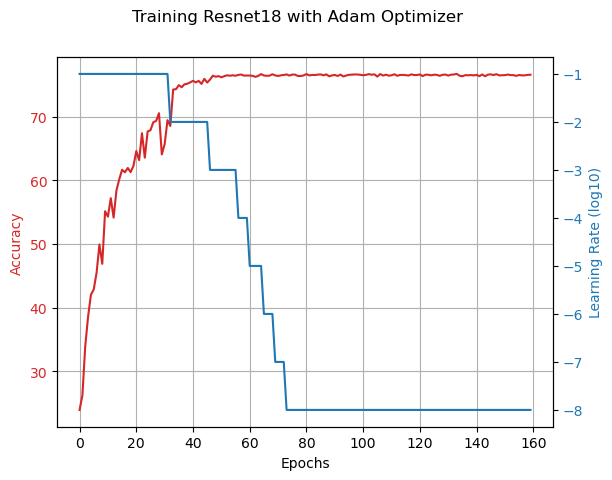

In [6]:
# wd=0? Why
bs=128
m=0.5
loaded=utils.load("adam_"+"bs_"+str(bs)+".json")

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(loaded["test_acc_v"], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Learning Rate (log10)', color=color)  # we already handled the x-label with ax1
ax2.plot(np.log10(loaded["current_lr_v"]), color=color)
ax2.tick_params(axis='y', labelcolor=color)

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.suptitle("Training Resnet18 with Adam Optimizer")

plt.show()

In [5]:
bs=128
m=0.5
loaded=utils.load("adam_"+"bs_"+str(bs)+".json")
print(max(loaded["test_acc_v"]))

76.75


In [ ]:
wd=5e-7
loaded_meta=model_actions.load_meta("./checkpoints/bs_128_sch_plateau_wd_"+str(wd)+"/bs_128_sch_plateau_wd_"+str(wd)+"_epoch_137")

In [27]:
loaded_meta["best_acc"]

84.52

In [ ]:
# Graph for adam wd trains

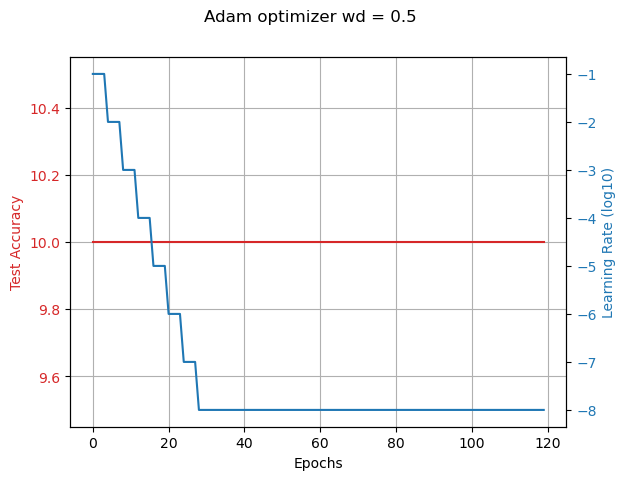

10.0


In [13]:
wd=5e-1
bs=128

loaded=utils.load("adam_"+"bs_"+str(bs)+"_sch_plateau_"+"wd_"+str(wd)+".json")

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Test Accuracy', color=color)
ax1.plot(loaded["test_acc_v"], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Learning Rate (log10)', color=color)  # we already handled the x-label with ax1
ax2.plot(np.log10(loaded["current_lr_v"]), color=color)
ax2.tick_params(axis='y', labelcolor=color)

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.suptitle("Adam optimizer wd = "+str(wd))

plt.show()
print(max(loaded["test_acc_v"]))

# Weight injections

In [14]:
#For epoch 160, 10k injections, weight decay, azure

wds=[0,5e-7,5e-5,5e-3]
#wds=[0]
sch="plateau"

tot=10000
step=1000
epoch=120

n_exp=5
bs=128

def inj_zero_plateau_epoch_120():

    for wd in wds:
        print("Inj iteration: " + str(wd))
        name = "adam_bs_"+str(bs)+"_sch_"+sch + "_wd_"+str(wd)
        
        path="./checkpoints/"+ name
        path_best= path + "/"+name+"_epoch_"+ str(epoch)

        model = model_actions.load(path_best)

        pfi_model = pfi_core(model.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())

        res = many_inj.progressive_inj_zero(pfi_model,tot,step,n_exp=n_exp)

        save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_"+ str(epoch)
        save_data={}
        save_data["avg"]=res[0]
        save_data["std"]=res[1]
        save_data["loss_avg"] = res[2]
        save_data["loss_std"] = res[3]
        utils.save(save_data,save_name)

In [ ]:
az_manage_proc.run_and_delete(log.log_time,inj_zero_plateau_epoch_120)

Found existing instance, use it.
Logging time
Inj iteration: 0
Injection: 0 of 10000
Injection: 1000 of 10000
Injection: 2000 of 10000
Injection: 3000 of 10000
Injection: 4000 of 10000
Injection: 5000 of 10000
Injection: 6000 of 10000
Injection: 7000 of 10000
Injection: 8000 of 10000
Injection: 9000 of 10000
Injection: 10000 of 10000
Inj iteration: 5e-07
Injection: 0 of 10000
Injection: 1000 of 10000
Injection: 2000 of 10000
Injection: 3000 of 10000
Injection: 4000 of 10000
Injection: 5000 of 10000
Injection: 6000 of 10000
Injection: 7000 of 10000
Injection: 8000 of 10000
Injection: 9000 of 10000
Injection: 10000 of 10000
Inj iteration: 5e-05
Injection: 0 of 10000
Injection: 1000 of 10000
Injection: 2000 of 10000
Injection: 3000 of 10000
Injection: 4000 of 10000
Injection: 5000 of 10000
Injection: 6000 of 10000
Injection: 7000 of 10000
Injection: 8000 of 10000
Injection: 9000 of 10000
Injection: 10000 of 10000
Inj iteration: 0.005
Injection: 0 of 10000
Injection: 1000 of 10000
Injectio

In [3]:
#For epoch 160, 100k injections, weight decay ,azure

wds=[0,5e-7,5e-5,5e-3]
#wds=[0]
sch="plateau"

tot=100000
step=10000
epoch=120

n_exp=5
bs=128

def inj_zero_plateau_epoch_120():

    for wd in wds:
        print("Inj iteration: " + str(wd))
        name = "adam_bs_"+str(bs)+"_sch_"+sch + "_wd_"+str(wd)
        
        path="./checkpoints/"+ name
        path_best= path + "/"+name+"_epoch_"+ str(epoch)

        model = model_actions.load(path_best)

        pfi_model = pfi_core(model.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())

        res = many_inj.progressive_inj_zero(pfi_model,tot,step,n_exp=n_exp)

        save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_"+ str(epoch)
        save_data={}
        save_data["avg"]=res[0]
        save_data["std"]=res[1]
        save_data["loss_avg"] = res[2]
        save_data["loss_std"] = res[3]
        utils.save(save_data,save_name)

In [5]:
az_manage_proc.run_and_delete(log.log_time,inj_zero_plateau_epoch_120)

Found existing instance, use it.
Logging time
Inj iteration: 0
Injection: 0 of 100000
Injection: 10000 of 100000
Injection: 20000 of 100000
Injection: 30000 of 100000
Injection: 40000 of 100000
Injection: 50000 of 100000
Injection: 60000 of 100000
Injection: 70000 of 100000
Injection: 80000 of 100000
Injection: 90000 of 100000
Injection: 100000 of 100000
Inj iteration: 5e-07
Injection: 0 of 100000
Injection: 10000 of 100000
Injection: 20000 of 100000
Injection: 30000 of 100000
Injection: 40000 of 100000
Injection: 50000 of 100000
Injection: 60000 of 100000
Injection: 70000 of 100000
Injection: 80000 of 100000
Injection: 90000 of 100000
Injection: 100000 of 100000
Inj iteration: 5e-05
Injection: 0 of 100000
Injection: 10000 of 100000
Injection: 20000 of 100000
Injection: 30000 of 100000
Injection: 40000 of 100000
Injection: 50000 of 100000
Injection: 60000 of 100000
Injection: 70000 of 100000
Injection: 80000 of 100000
Injection: 90000 of 100000
Injection: 100000 of 100000
Inj iteration

# Weight inj graphs

Inj for: 0
Inj for: 5e-07
Inj for: 5e-05
Inj for: 0.005


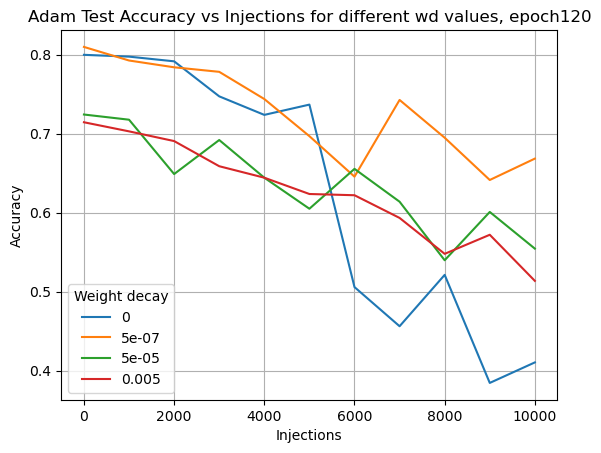

In [8]:
#Graphs for 10k injections, all epoch 160
wds=[0,5e-7,5e-5,5e-3]
sch="plateau"
tot=10000
step=1000
epoch=120

n_exp=5
best_accs=[]
x=np.array(range(0,11))*step
bs=128
#remember to change name

for wd in wds:
    print("Inj for: " + str(wd))
    name = "adam_bs_"+str(bs)+"_sch_"+sch + "_wd_"+str(wd)
    save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_"+str(epoch)
    loaded=utils.load(save_name + ".json")
    best_accs.append(loaded["avg"][0])
    plt.plot(x,loaded["avg"])

plt.title("Adam Test Accuracy vs Injections for different wd values, epoch"+str(epoch))
plt.legend(wds,title="Weight decay")
plt.xlabel("Injections")
plt.ylabel("Accuracy")
plt.grid()

Text(0, 0.5, 'Test Accuracy')

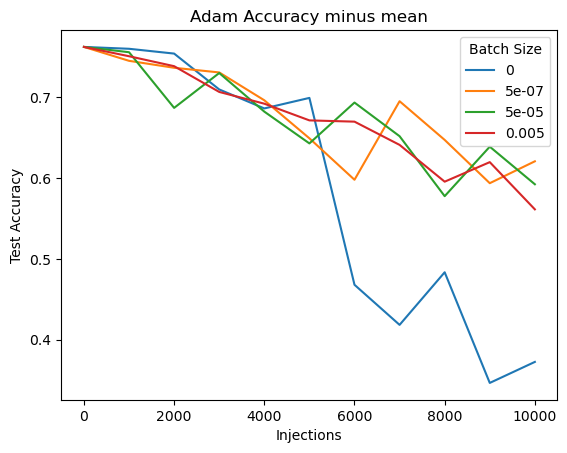

In [12]:
#Graphs for 10k injections, all epoch 160, minus offset

params=[0,5e-7,5e-5,5e-3]
#bss=[64,128]
sch="plateau"

tot=10000
step=1000
n_exp=5

bs=128

best_accs=[]
x=np.array(range(0,11))*step

#Change name

for param in params:
    name = "adam_bs_"+str(bs)+"_sch_"+sch + "_wd_"+str(param)

    save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_"+str(epoch)
    loaded=utils.load(save_name + ".json")

    best_accs.append(loaded["avg"][0])

best_accs_avg=np.mean(best_accs)

for param in params:
    name = "adam_bs_"+str(bs)+"_sch_"+sch + "_wd_"+str(param)

    save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_"+str(epoch)
    loaded=utils.load(save_name + ".json")

    offset = loaded["avg"][0] - best_accs_avg
    plt.plot(x,(np.array(loaded["avg"]) - offset))

plt.title("Adam Accuracy minus mean")
plt.legend(params,title="Weight Decay")
plt.xlabel("Injections")
plt.ylabel("Test Accuracy")

Inj for: 0
Inj for: 5e-07
Inj for: 5e-05
Inj for: 0.005


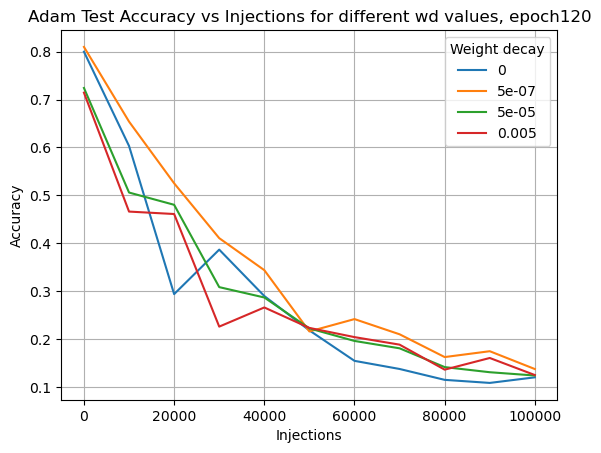

In [2]:
#Graphs for 100k injections, all epoch 160
wds=[0,5e-7,5e-5,5e-3]
sch="plateau"
tot=100000
step=10000
epoch=120

n_exp=5
best_accs=[]
x=np.array(range(0,11))*step
bs=128
#remember to change name

for wd in wds:
    print("Inj for: " + str(wd))
    name = "adam_bs_"+str(bs)+"_sch_"+sch + "_wd_"+str(wd)
    save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_"+str(epoch)
    loaded=utils.load(save_name + ".json")
    best_accs.append(loaded["avg"][0])
    plt.plot(x,loaded["avg"])

plt.title("Adam Test Accuracy vs Injections for different wd values, epoch"+str(epoch))
plt.legend(wds,title="Weight decay")
plt.xlabel("Injections")
plt.ylabel("Accuracy")
plt.grid()